In [1]:
import numpy as np
import sunpy
import sunpy.map
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.visualization import AsinhStretch, ImageNormalize

In [25]:
phi_bmag_map = sunpy.map.Map("../../src/PHI/20231012_test/solo_L2_phi-hrt-bmag_20231012T001503_V01.fits")
phi_binc_map = sunpy.map.Map("../../src/PHI/20231012_test/solo_L2_phi-hrt-binc_20231012T001503_V01.fits")
phi_bazi_map = sunpy.map.Map("../../src/PHI/20231012_test/solo_L2_phi-hrt-bazi_20231012T001503_V01.fits")

In [26]:
phi_bazi_map = phi_bazi_map.submap([128, 128]*u.pixel,
                                   top_right=[1791, 1791-128]*u.pixel)
phi_bmag_map = phi_bmag_map.submap([128, 128]*u.pixel,
                                      top_right=[1791-128, 1791-128]*u.pixel)
phi_binc_map = phi_binc_map.submap([128, 128]*u.pixel,
                                        top_right=[1791-128, 1791-128]*u.pixel)

In [27]:
Txshift_phi_hmi, Tyshift_phi_hmi = 0*u.arcsec, 0*u.arcsec

In [28]:
phi_bmag_map = phi_bmag_map.shift_reference_coord(Txshift_phi_hmi, Tyshift_phi_hmi)
phi_binc_map = phi_binc_map.shift_reference_coord(Txshift_phi_hmi, Tyshift_phi_hmi)
phi_bazi_map = phi_bazi_map.shift_reference_coord(Txshift_phi_hmi, Tyshift_phi_hmi)

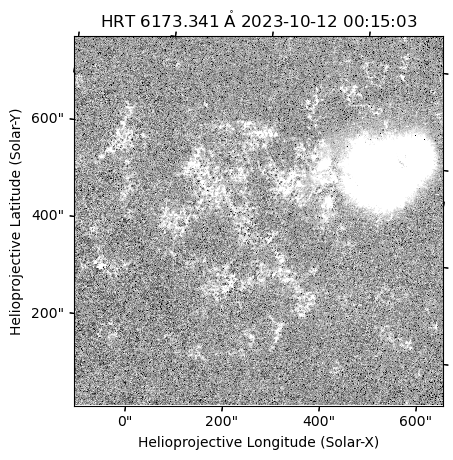

In [29]:
phi_bmag_map.plot(vmin=0, vmax=500, norm=ImageNormalize(stretch=AsinhStretch()))

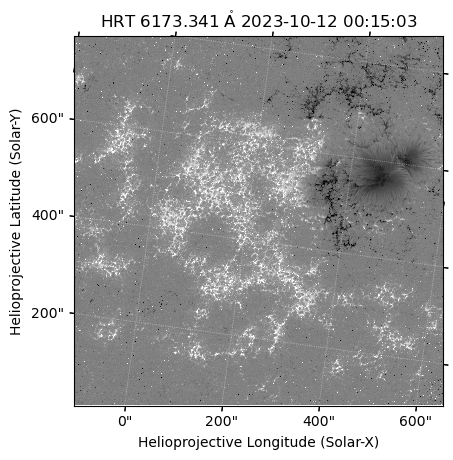

In [30]:
phi_binc_map.plot(vmin=0,vmax=180)

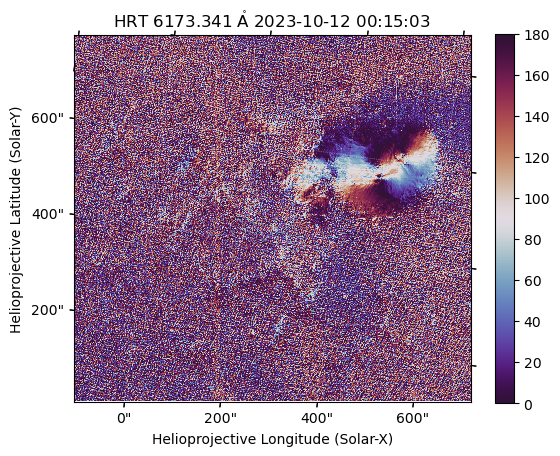

In [31]:
phi_bazi_map.plot(vmin=0,vmax=180, interpolation='none', cmap='twilight_shifted')
plt.colorbar()

In [32]:
xcen_long = np.rad2deg(np.arcsin(phi_bmag_map.meta['crval1']/phi_bmag_map.meta['rsun_arc']))
ycen_lat = np.rad2deg(np.arcsin(phi_bmag_map.meta['crval2']/phi_bmag_map.meta['rsun_arc']))
xcen_long, ycen_lat

(6.319645372954661, 7.236606727987487)

In [33]:
phi_bmag_map.data.shape

(1536, 1536)

In [34]:
with open("../../src/PHI/20231012_test/phi_20231012_test.dat", "w") as f:
    np.savetxt(f, np.array([phi_bmag_map.data.T.shape]), fmt='%10d',)
    np.savetxt(f, np.array([[phi_bmag_map.meta['cdelt1'], phi_bmag_map.meta['cdelt2']]]), fmt='%10f',)
    np.savetxt(f, np.array([[phi_bmag_map.meta['solar_b0'], phi_bmag_map.meta['solar_p0'], phi_bmag_map.meta['rsun_arc']]]), fmt='%10.2f',)
    np.savetxt(f, np.array([[xcen_long, ycen_lat]]), fmt='%10.2f',)
    np.savetxt(f, phi_bmag_map.data.T.reshape(-1,6), fmt='%10.2f',)
    np.savetxt(f, phi_binc_map.data.T.reshape(-1,6), fmt='%10.1f',)
    np.savetxt(f, phi_bazi_map.data.T.reshape(-1,6) - phi_bazi_map.meta['crota'], fmt='%10.1f',)